In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = "/home/kmpiston/linker_2021/proline_mutations/charmm-gui-3032962052/gromacs/"
tpr = 'pro_mut.tpr'
traj = 'center_pro_mut.xtc'

In [3]:
#Universe
u = mda.Universe(path+tpr,path+traj)

In [4]:
#Creating an average structure to use as reference

average = align.AverageStructure(u,u,select='resid 0:37 and name CA', ref_frame=0).run()


/home/kmpiston/.local/lib/python3.7/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/kmpiston/.local/lib/python3.7/site-packages/MDAnalysis/core/topologyattrs.py:2011: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
/home/kmpiston/.local/lib/python3.7/site-packages/MDAnalysis/core/topologyobjects.py:600: DeprecationWarning: 

In [5]:
ref = average.universe


In [6]:
#Aligning the trajectory to a reference 

aligner = align.AlignTraj(u,ref, select='resid 0:37 and name CA', in_memory=True).run()



In [7]:
c_alphas = u.select_atoms('resid 0:37 and name CA')
R = rms.RMSF(c_alphas).run()


In [8]:
y = R.rmsf
x = c_alphas.resids


In [9]:
df = pd.DataFrame({'Residue Number':x, 'RMSF':y})

In [15]:
df = df.set_index(df['Residue Number'])


In [16]:
from scipy import stats
df['y_error']= stats.sem(df['RMSF'])*1.96 -.05

In [18]:
err = df['y_error']


In [19]:
#For Control System
"""abbrev_col = ['A1 ','R2 ','T3 ','K4 ','Q5 ','T6 ','A7 ','R8 ','K9 ','S10','T11'
              , 'G12','G13','K14','A15','P16','R17','K18','Q19','L20','A21',
              'T22','K23','A24','A25','R26','K27','S28','A29','P30','A31',
              'T32','G33','G34','V35','K36','K37','P38']
"""
#For mutation systems
abbrev_col = ['A1 ','R2 ','T3 ','K4 ','Q5 ','T6 ','A7 ','R8 ','K9 ','S10','T11'
              , 'G12','G13','K14','A15','*P16A','R17','K18','Q19','L20','A21',
              'T22','K23','A24','A25','R26','K27','S28','A29','*P30A','A31',
              'T32','G33','G34','V35','K36','K37','*P38A']



In [20]:
resid = np.arange(38)
resid

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [21]:
colors = []
for c in range(38):
    if c == 15:
        #colors.append('xkcd:burnt orange')
        colors.append('xkcd:bluey purple')
    elif c == 29:
        #colors.append('xkcd:burnt orange')
        colors.append('xkcd:bluey purple')
    elif c == 37:
        #colors.append('xkcd:burnt orange')
        colors.append('xkcd:bluey purple')
    else:
        colors.append('white')
colors

['white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'xkcd:bluey purple',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'xkcd:bluey purple',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'xkcd:bluey purple']

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


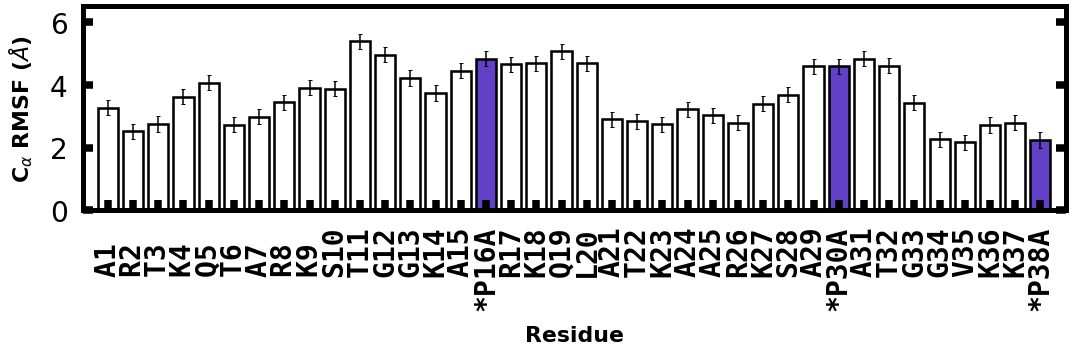

In [22]:
fig_dims= (15,5)
#sns.set_style("dark")
#matplotlib.style.use('_classic_test')
font  = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

#plt.rcParams['font.size'] = 18

fig, ax = plt.subplots(figsize = fig_dims)
#Plots
ax.bar(x,y,yerr=err, 
       align='center',
       color = colors,
       edgecolor = 'black',
       linewidth = 2.55,
       #alpha=.5, 
       ecolor='black',
       capsize = 2)
plt.xticks(rotation = 90,fontsize=14, fontfamily='monospace', fontstretch='condensed', weight='bold')
plt.xticks(resid,abbrev_col)
plt.yticks([0,2,4,6])
#ax.axes.get_yaxis().set_ticks([])
#ax.tick_params(direction='out', left=False,width=4, length =6)

ax.set_xlabel("Residue", fontdict=font, labelpad=15)
ax.set_ylabel(r"C$_\alpha$ RMSF ($\AA$)",fontdict=font, labelpad=15)
ax.set_xlim(resid.min()-1, resid.max()+1)
ax.set_ylim(0,6.5)
ax.tick_params(direction="in", width=7.5, length =10, right=True, top=False, bottom= True, labelsize =28, pad=15)#, bottom= False)
ax.spines["top"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)

plt.tight_layout()
#plt.savefig("rmsf_fig_prolinemuation.png", dpi= 300, transparent=True)

In [26]:
#Save DF 
df.to_csv('/home/kmpiston/DNA_analy/2RMSF/Figure3_MutationRMSF.csv')

'/home/kmpiston/DNA_analy/2RMSF'